Testing biological calibration of the Salish Sea Atlantis Model

In [2]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
strait_of_georgia = [54,64,68,79,62,80,81,82,83,84,85,86,88,90,91,92,94,96,98,101,102]
sog_south = [54,64,68,79]
sog_center = [62,80,81,82,83,84,85]
sog_north = [86,88,90,91,92,94,96,98,101,102]
puget_sound_main = [20,21,23,26]
fraser_river_plume = [75,80,81]

### Puget Sound Data

In [7]:
# Extracting AMPS diatom data
amps_filename = "AMPS_OUT_7.nc"
amps_data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/" + amps_filename
amps_data = xr.open_dataset(str(amps_data_file), decode_cf=True) #[t, box, z]

amps_time = amps_data.t
amps_volume = amps_data.volume
diatoms_amps_tbz = amps_data.Lrg_Phyto_N * amps_volume #convert to mg N 
diatoms_amps_tb = diatoms_amps_tbz[:,:,0:6].sum(axis=2)
diatoms_amps_t = diatoms_amps_tb.sum(axis=1) * 1e-9 # convert from mg N to tonnes

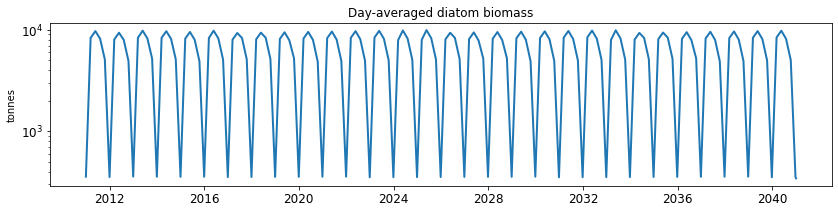

In [9]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.semilogy(amps_time, diatoms_amps_t, linewidth = 2) #semilogy
ax.set_title('Day-averaged diatom biomass', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
#ax.legend(('Puget Sound Atlantis diatoms'), loc='best');

## Phytoplankton

In [4]:
filename = "v6718_365_20241105_fisheriesOFF"
# One year of daily output, after the 15-year model burn-in. Year of output starts at 2007.

In [5]:
# Extracting SSAM diatom data
diatom_filename = "v6718_365_20241105_fisheriesOFF"
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + diatom_filename + "/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True) #[t, box, z]

ssam_time = data.t
ssam_volume = data.volume
diatoms_SSAM_per_m3 = data.Diatom_N
diatoms_SSAM_tbz = diatoms_SSAM_per_m3 * ssam_volume #convert to mg N 
diatoms_SSAM_tb = diatoms_SSAM_tbz[:,strait_of_georgia,0:6].sum(axis=2) # only water column for SoG
diatoms_SSAM_t = diatoms_SSAM_tb.sum(axis=1) * 1e-9 # convert from mg N to tonnes

In [6]:
# water column silica
silica = data.Si[:,:,0:6]
si_tb = silica.sum(axis=2)
si_t = si_tb.mean(axis=1)

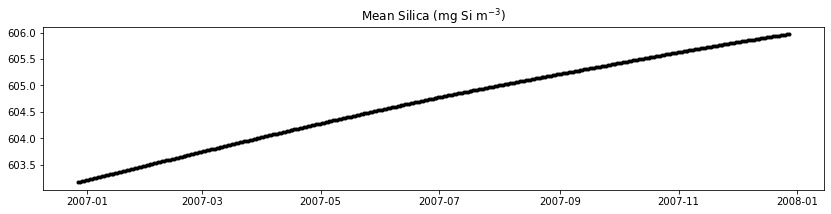

In [13]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(data.t, si_t, 'k.', linewidth = 2) #semilogy
ax.set_title('Mean Silica (mg Si m$^{-3}$)', fontsize = 12);

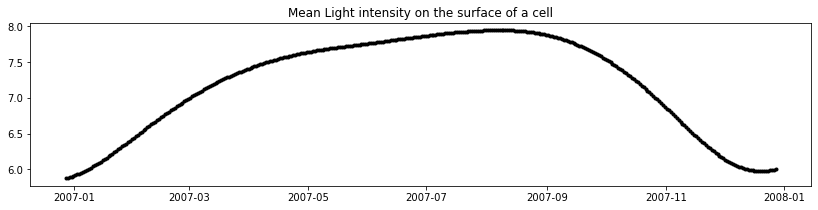

In [12]:
# Surface light
Light_tb = data.DayLight[:,:,5]
Light_t = Light_tb.mean(axis=1)
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(data.t, Light_t, 'k.', linewidth = 2) #semilogy
ax.set_title('Mean Light intensity on the surface of a cell', fontsize = 12);

In [12]:
# SalishSeaCast daily averaged diatom data for 30 days in 2007
ssc_data = xr.open_dataset('/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_compressed_20070101_20070131.nc')
mesh = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

ssc_volume = (mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
diatoms_SSC_tzyx = ssc_data.diatoms # [t,z,y,x]
diatoms_SSC_tzyx = diatoms_SSC_tzyx * ssc_volume # convert from mmol m-3 to mmol
# Convert mmol N * 0.001 mol N * 14.0067 g/mol * 0.000001 tonnes 
diatoms_SSC_tzy = diatoms_SSC_tzyx.sum(axis=3)
diatoms_SSC_tz = diatoms_SSC_tzy.sum(axis=2)
diatoms_SSC_t = diatoms_SSC_tz.sum(axis=1) * (0.001*14.0067*0.000001) #convert to tonnes

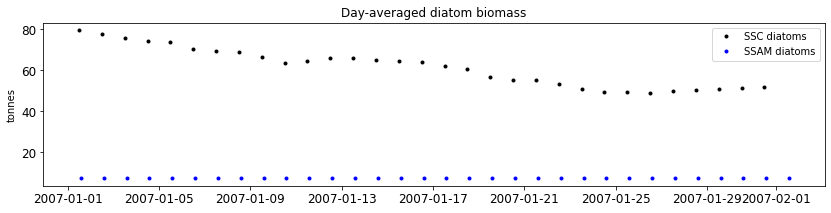

In [13]:
# All SSAM layers

fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(ssc_data.time, diatoms_SSC_t, 'k.', linewidth = 2) #semilogy
ax.plot(ssam_time[5:37], diatoms_SSAM_t[5:37],'b.', linewidth = 2)
ax.set_title('Day-averaged diatom biomass', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(('SSC diatoms', 'SSAM diatoms'), loc='best');

In [14]:
# Sediment
diatom_SSAM_sediment_tb = diatoms_SSAM_per_m3[:,strait_of_georgia,6] # only water column for SoG
diatom_SSAM_sediment_t = diatom_SSAM_sediment_tb.mean(axis=1)

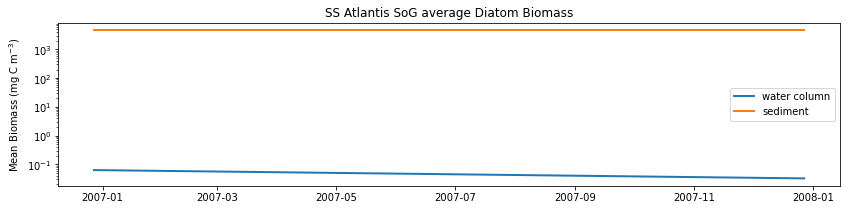

In [15]:
diatom_SSAM_N_tbz = diatoms_SSAM_per_m3[:,strait_of_georgia,0:6] # only water column for SoG
diatom_SSAM_N_tb = diatom_SSAM_N_tbz.sum(axis=2)
diatom_SSAM_N_t = diatom_SSAM_N_tb.mean(axis=1)
fig, ax = plt.subplots(figsize = (14,3)) 
ax.semilogy(ssam_time, diatom_SSAM_N_t*6.625, linewidth = 2) #semilogy
ax.semilogy(ssam_time, diatom_SSAM_sediment_t*6.625, linewidth = 2) #semilogy
ax.set_ylabel('Mean Biomass (mg C m$^{-3}$)')
ax.set_title('SS Atlantis SoG average Diatom Biomass', fontsize = 12);
ax.legend(('water column', 'sediment'), loc='best');

In [ ]:
# Extracting SSAM diatom data
diatom_filename = "v6718_365_20241105_fisheriesOFF"
longer_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + diatom_filename + "/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True) #[t, box, z]

ssam_time = data.t
ssam_volume = data.volume
diatoms_SSAM_per_m3 = data.Diatom_N
diatoms_SSAM_tbz = diatoms_SSAM_per_m3 * ssam_volume #convert to mg N 
diatoms_SSAM_tb = diatoms_SSAM_tbz[:,strait_of_georgia,0:6].sum(axis=2) # only water column for SoG
diatoms_SSAM_t = diatoms_SSAM_tb.sum(axis=1) * 1e-9 # convert from mg N to tonnes



diatom_SSAM_N_tbz = diatoms_SSAM_per_m3[:,strait_of_georgia,0:6] # only water column for SoG
diatom_SSAM_N_tb = diatom_SSAM_N_tbz.sum(axis=2)
diatom_SSAM_N_t = diatom_SSAM_N_tb.mean(axis=1)
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(ssam_time, diatom_SSAM_N_t*6.625, 'b', linewidth = 2) #semilogy
ax.set_ylabel('Mean Biomass (mg C m$^{-3}$)')
ax.set_title('SS Atlantis SoG average Diatom Biomass', fontsize = 12);

In [25]:
picos_SSAM_tbz = data.PicoPhytopl_N * ssam_volume #convert to mg N 
picos_SSAM_tb = picos_SSAM_tbz[:,strait_of_georgia,0:6].sum(axis=2)
picos_SSAM_t = picos_SSAM_tb.sum(axis=1) * 1e-9 # convert from mg N to tonnes

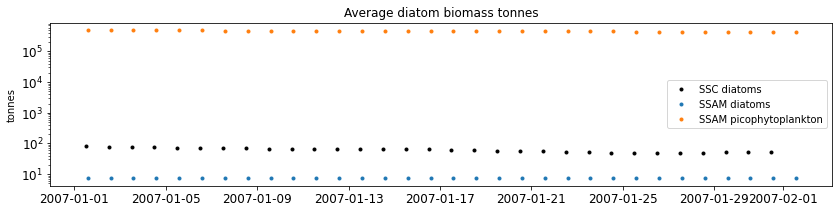

In [30]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.semilogy(ssc_data.time, diatoms_SSC_t, 'k.', linewidth = 2)
ax.semilogy(ssam_time[5:37], diatoms_SSAM_t[5:37],'.', linewidth = 2)
ax.semilogy(ssam_time[5:37], picos_SSAM_t[5:37], '.', linewidth = 2)
ax.set_title('Average diatom biomass tonnes', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(('SSC diatoms', 'SSAM diatoms', 'SSAM picophytoplankton'), loc='best');

Atlantis water column biomass is within the same order of magniutude for SoG. Most biomass reported earlier was found in the sediment and not in the water column. Picophytoplankton biomass is orders of magnitude higher. Susan suggests we investigate the biomass during the spring (May) as biomass during the winter (January) is typically quite low. Need to pull daily averages values from SalishSeaCast for spring.

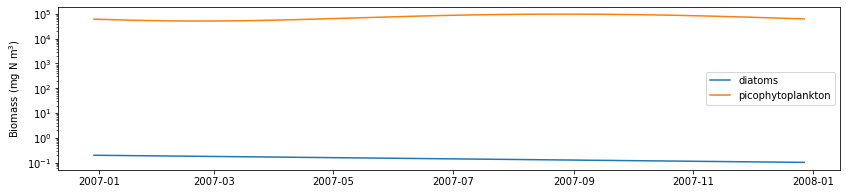

In [32]:
bio_group = groups.phytoplankton
location = strait_of_georgia
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'_N'][:,location,0:6]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.semilogy(time[start:end],nums_t[start:end])
ax.legend(bio_group)
ax.set_ylabel('Biomass (mg N m$^3$)');

In [38]:
# Checking the same plots in terms of nitrogen
diatoms_SSAM_N = diatom_SSAM_N_tbz * ssam_volume[:,strait_of_georgia,0:6] #mg N
diatoms_SSAM_N = diatoms_SSAM_N.sum(axis=2)
diatoms_SSAM_N_t = diatoms_SSAM_N.sum(axis=1)
diatoms_SSC_N = diatoms_SSC_tz.sum(axis=1) * 14.006747 #mg N


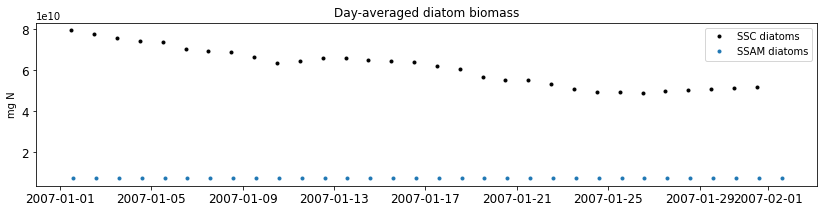

In [41]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(ssc_data.time, diatoms_SSC_N, 'k.', linewidth = 2) #semilogy
ax.plot(ssam_time[5:37], diatoms_SSAM_N_t[5:37],'.', linewidth = 2)
ax.set_title('Day-averaged diatom biomass', fontsize = 12)
ax.set_ylabel('mg N')
ax.tick_params(labelsize=12)
ax.legend(('SSC diatoms', 'SSAM diatoms'), loc='best');

In [53]:
def plot_pelagic_depth(group, location):

    fig = plt.figure(figsize=(18, 27), facecolor='white')
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

    data.z
    depth = [450, 250, 100, 50, 25, 0] #700, 450, 

    for species in group:

        names = []

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 8: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        ax.set_ylim(700, 0)  # decreasing depth
            
        pelagic_oiled_m3 = data.variables[group[species] + '_N'][:,location,0:6]
        pelagic_oiled = pelagic_oiled_m3 * ssam_volume[:,location,0:6]
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, 'o',linewidth = 7) #color=line_colour, linestyle=line_type,
        #ax.pcolormesh(p_oiled[:,0], pelagic_oiled[0,:], cmap='RdBu') #,vmin=z_min, vmax=z_max
        ax.set_title(species);
        ax.set_ylabel('depth, m')
        ax.set_xlabel('mg N ')
    #ax.legend(str(filename), bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', )

Without the sediment layer

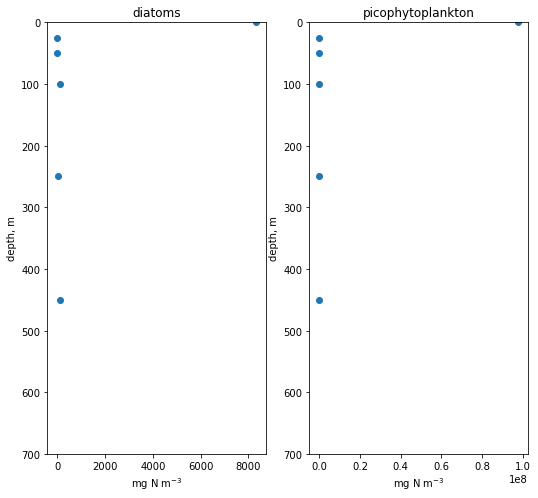

In [66]:
plot_pelagic_depth(groups.phytoplankton, groups.salish_sea) #without sediment layer

With the sediment layer included

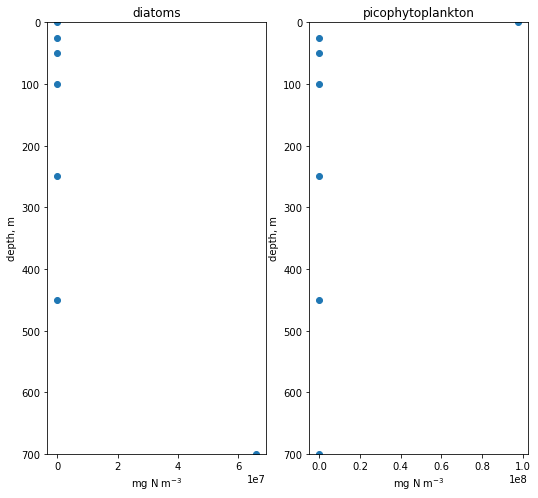

In [64]:
plot_pelagic_depth(groups.phytoplankton, groups.salish_sea)

## Maps

In [28]:
# Reading in Atlantis map

shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df_original = gpd.read_file(shapefile_name)
data_df_original = data_df_original.sort_values(by=['BOX_ID'])
data_df = data_df_original.set_index('BOX_ID')
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

In [71]:
filename = "v6718_365_20241105_fisheriesOFF"
# One year of daily output, after the 15-year model burn-in. Year of output starts at 2007.


In [17]:
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + filename + "/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True) #[t, box, z


In [18]:
time = data.t

### Surface values

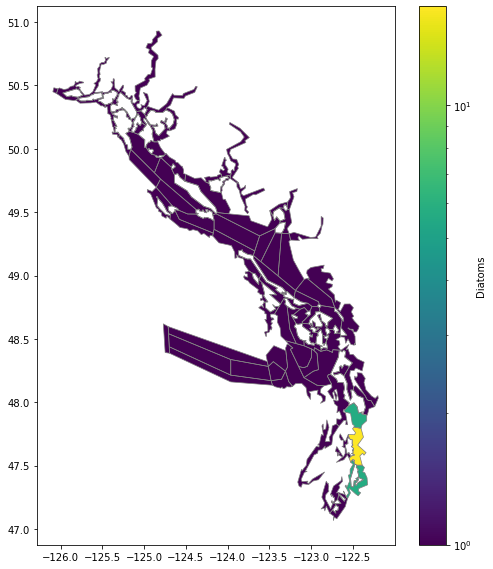

In [50]:
plot_data = data.Diatom_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Diatoms'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

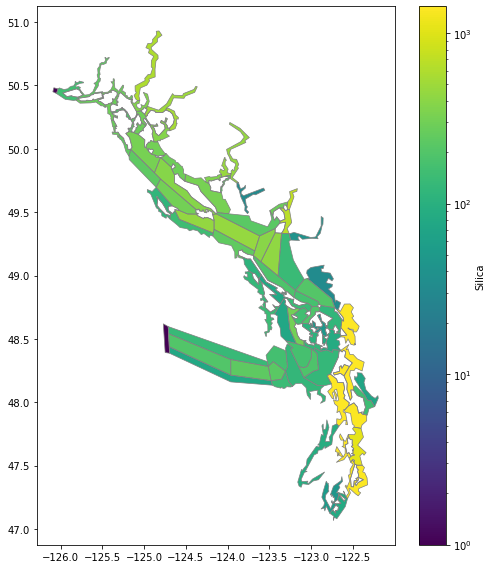

In [43]:
plot_data = data.Si[360,:,5]
#plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Silica'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

Doesn't appear to be silica limitation, although Beth suggests we could still put silica into the deep water boundary boxes so that they can be advected into the system, given that the rivers are sources of silica in the Salish Sea, and there is no silica limitation in the system.

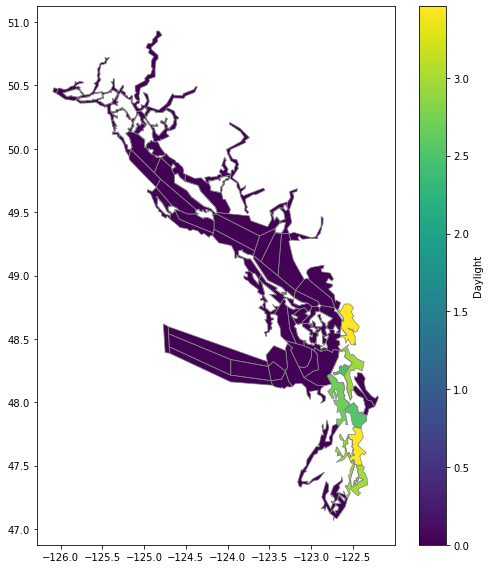

In [44]:
plot_data = data.Light[360,:,5]
#plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,#norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Daylight'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

Beth suggests that it might be good to look at daylight with sub-day timesteps. This run only outputs once a day. Nevertheless, there is light available in Puget Sound, which suggests there should be light available in other places if there were no shading, so shading seems to be a problem.

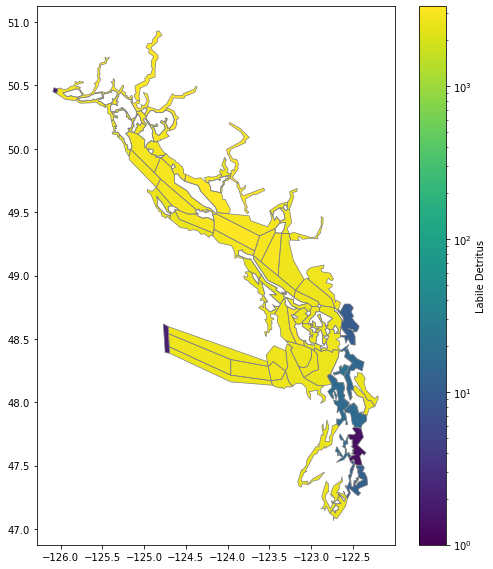

In [42]:
plot_data = data.Lab_Det_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Labile Detritus'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

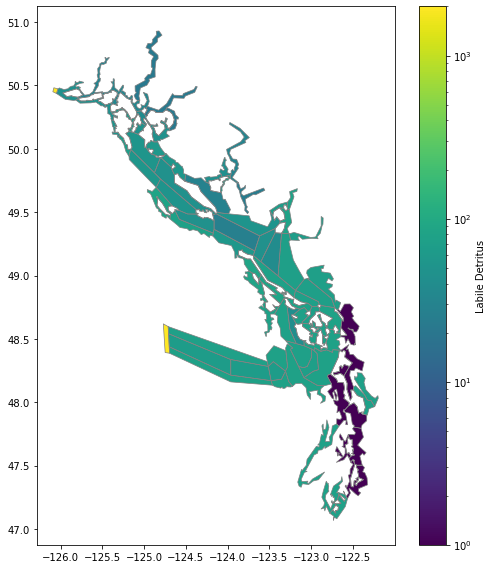

In [49]:
plot_data = data.Ref_Det_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Labile Detritus'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

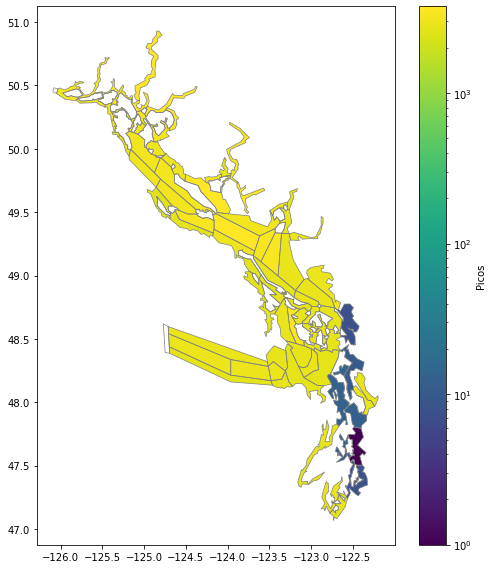

In [40]:
plot_data = data.PicoPhytopl_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Picos'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

There is very high detritus (Lab_det + Ref_Det) as well as Picos in the system compared to diatoms, which could be the source of the shading and reduction in light levels in the surface. Beth suggests to try scaling back the picos (inreasing their mortality). This might lead to more detritus, but there would be less standing stock to begin with, so maybe less detritus overall. 

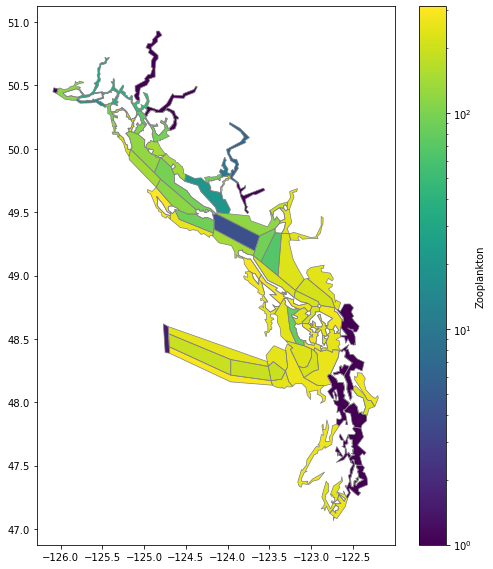

In [51]:
plot_data = data.Zoo_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Zooplankton'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

### Light intensity in other run files

In [40]:
# Testing light on a run with output at 0.5 day cadence

file_location = '/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/Atlantis_trunk_on_Github/outputSalishSea.nc'
test = xr.open_dataset(str(file_location), decode_cf=True)

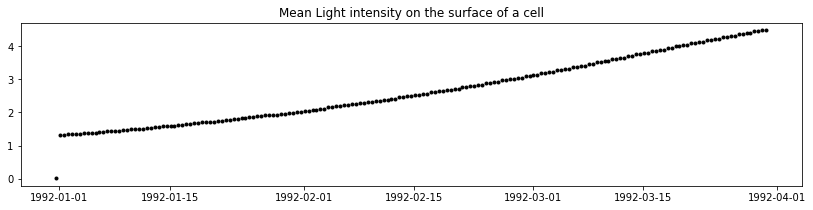

In [41]:
# Surface light
Light_tb = test.DayLight[:,:,5]
Light_t = Light_tb.mean(axis=1)
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(test.t, Light_t, 'k.', linewidth = 2) #semilogy
ax.set_title('Mean Light intensity on the surface of a cell', fontsize = 12);

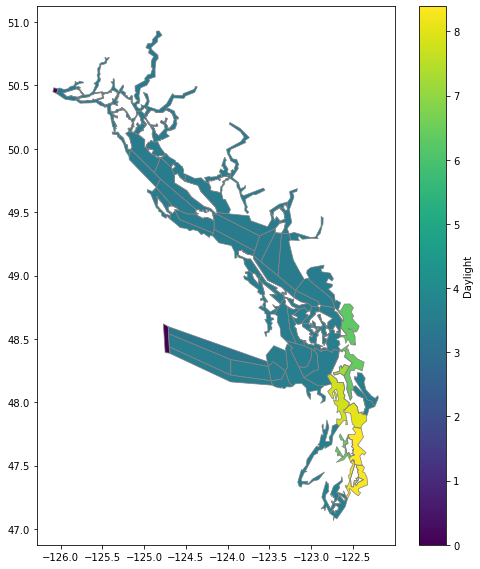

In [43]:
# Surface Light
plot_data = test.DayLight[89,:,5]
data_df['plot_data'] = plot_data 
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,#norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Daylight'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

In [20]:
# 50y run
file_location = '/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/v6718_50y_20241105_start5475/outputSalishSea.nc'
test_50y = xr.open_dataset(str(file_location), decode_cf=True)

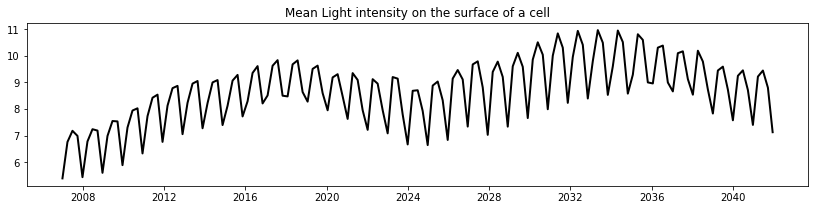

In [22]:
# Surface light
Light_tb = test_50y.DayLight[:,:,5]
Light_t = Light_tb.mean(axis=1)
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(test_50y.t, Light_t, 'k', linewidth = 2) #semilogy
ax.set_title('Mean Light intensity on the surface of a cell', fontsize = 12);

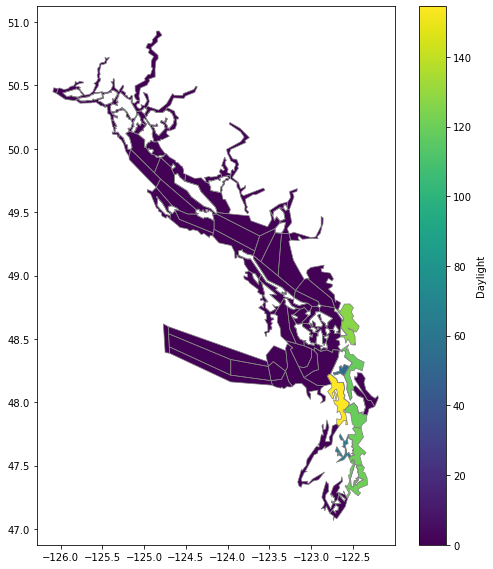

In [39]:
# Surface Light
plot_data = test_50y.DayLight[142,:,5]
data_df['plot_test2'] = plot_data 
land_df = data_df.loc[land_boxes]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_test2', ax=ax, cax=cax,#norm=colors.LogNorm(vmin=1, vmax=data_df.plot_test2.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Daylight'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

## Wild salmon

In [19]:
def map_numbers(variable, timestamp):
    variable_name = variable + '_Nums'
    plot_data = data.variables[variable_name][timestamp,:,:]
    #plot_data = plot_data.sum(axis=0)
    data_df['plot_data'] = plot_data.sum(axis=1)
    land_df = data_df.loc[land_boxes]
    ps_df = data_df.loc[puget_sound_main]
    
    fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=-0.95) 
    ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': variable_name
    },)
    data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
    land_df.plot(ax=ax, color='white');

In [47]:
time = np.ma.filled(data.variables['t'], np.nan)

In [67]:
def map_inv_biomass(variable, timestamp, v_min=None, v_max=None):
    plot_data = (data.variables[variable + '_StructN'][timestamp,:,:] + data.variables[variable + '_ResN'][timestamp,:,:] * data.variables[variable + '_Nums'][timestamp,:,:])*20*5.7*(3.65/2.65)/1000000
    #plot_data = plot_data.sum(axis=0)
    data_df['plot_data'] = plot_data.sum(axis=1) 
    land_df = data_df.loc[land_boxes]

    fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=-0.95) 
    ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), vmin=v_min, vmax=v_max, #cmap=cm.Greens,
    legend=True, legend_kwds={'label': variable +' wet weight biomass (tonnes)'
    },)
    data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
    land_df.plot(ax=ax, color='white')
    ax.set_title(variable +' at time '+ str(time[timestamp]), fontsize = 12);

In [68]:
def map_biomass(variable, timestamp, v_min=None, v_max=None):
    plot_data = data.variables[variable + '_N'][timestamp,:,6] #*20*5.7*(3.65/2.65)/1000000
    #plot_data = plot_data.sum(axis=0)
    data_df['plot_data'] = plot_data #.sum(axis=1) 
    land_df = data_df.loc[land_boxes]

    fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=-0.95) 
    ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), vmin=v_min, vmax=v_max, #cmap=cm.Greens,
    legend=True, legend_kwds={'label': variable #+' wet weight biomass (tonnes)'
    },)
    data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
    land_df.plot(ax=ax, color='white')
    ax.set_title(variable +' at time '+ str(time[timestamp]), fontsize = 12);

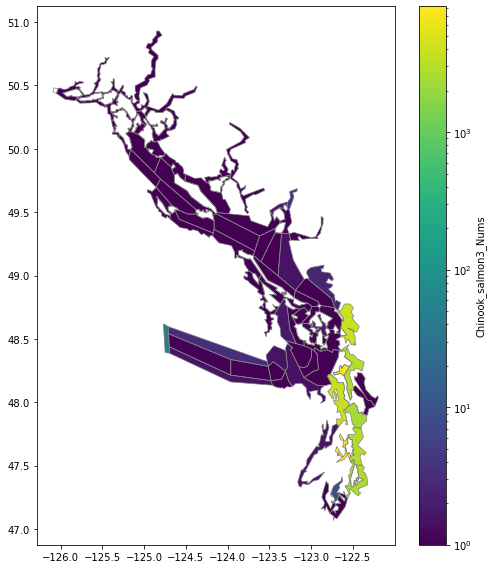

In [65]:
map_numbers('Chinook_salmon3',90)

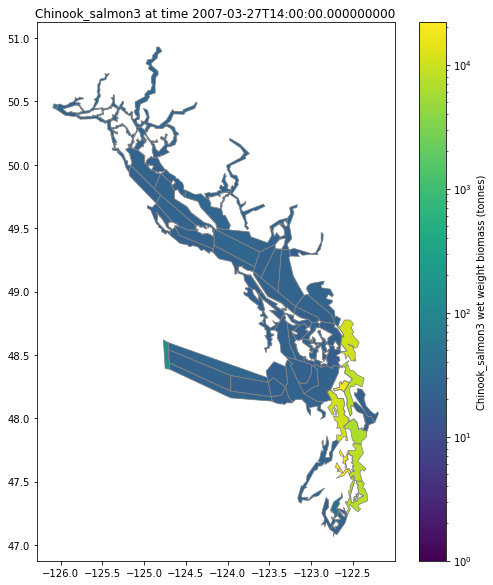

In [74]:
map_inv_biomass('Chinook_salmon3', 90)

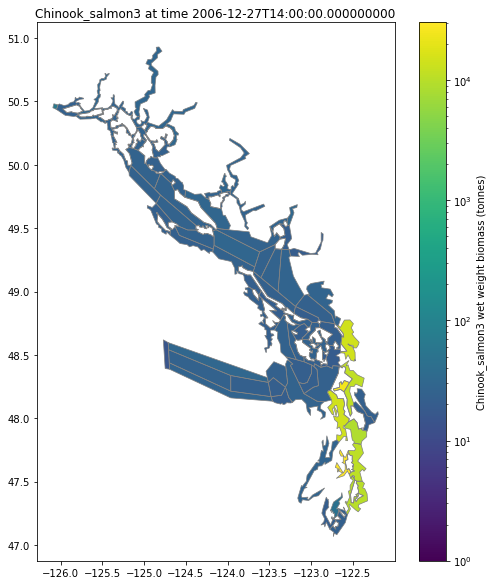

In [75]:
map_inv_biomass('Chinook_salmon3', 0)

Now that we know we only really get diatoms in Puget Sound, this may help to explain why the larger biomass congregate in that area over time, possibly following food. Perhaps also check zooplankton biomass.

In [ ]:
plot_data = data.PicoPhytopl_N[360,:,5]
#plot_data = plot_data.sum(axis=1)
data_df['plot_data'] = plot_data #.sum(axis=1)
land_df = data_df.loc[land_boxes]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
legend=True, legend_kwds={'label': 'Picos'
},)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

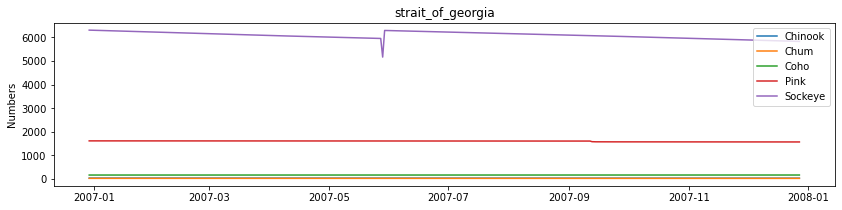

In [28]:
bio_group = groups.wild_salmon
location = strait_of_georgia
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'3_Nums'][:,location,:]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.plot(time[start:end],nums_t[start:end])
ax.legend(bio_group)
ax.set_title('strait_of_georgia', fontsize = 12)
ax.set_ylabel('Numbers');

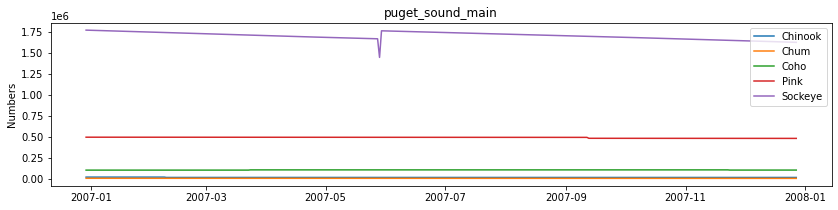

In [35]:
bio_group = groups.wild_salmon
location = puget_sound_main
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'3_Nums'][:,location,:]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.plot(time[start:end],nums_t[start:end])
ax.legend(bio_group)
ax.set_title('puget_sound_main', fontsize = 12)
ax.set_ylabel('Numbers');

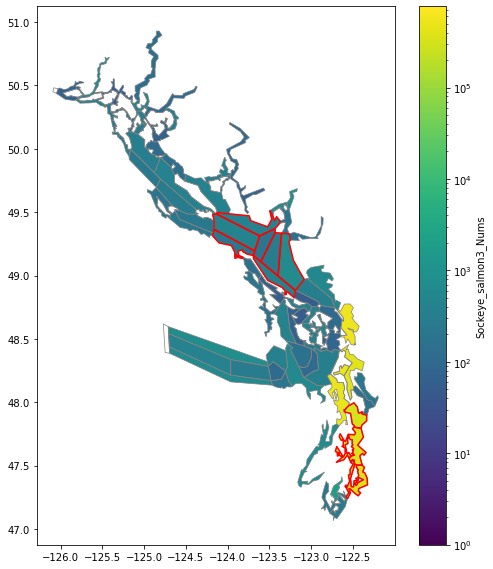

In [32]:
variable_name = 'Sockeye_salmon3_Nums'
plot_data = data.variables[variable_name][0,:]
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
strait_df = data_df.loc[sog_center]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()),#vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': variable_name
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
strait_df.boundary.plot(ax=ax, color='red');
ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');


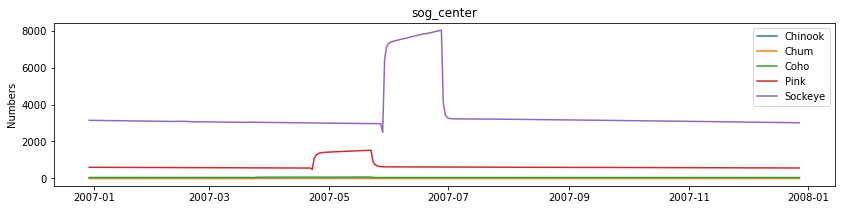

In [29]:
bio_group = groups.wild_salmon
location = sog_center
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'1_Nums'][:,location,:]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.plot(time[start:end],nums_t[start:end])
ax.legend(bio_group)
ax.set_title('sog_center', fontsize = 12)
ax.set_ylabel('Numbers');

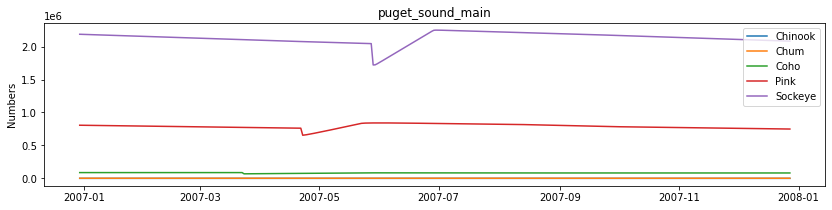

In [30]:
bio_group = groups.wild_salmon
location = puget_sound_main
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'1_Nums'][:,location,:]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.plot(time[start:end],nums_t[start:end])
ax.legend(bio_group)
ax.set_title('puget_sound_main', fontsize = 12)
ax.set_ylabel('Numbers');

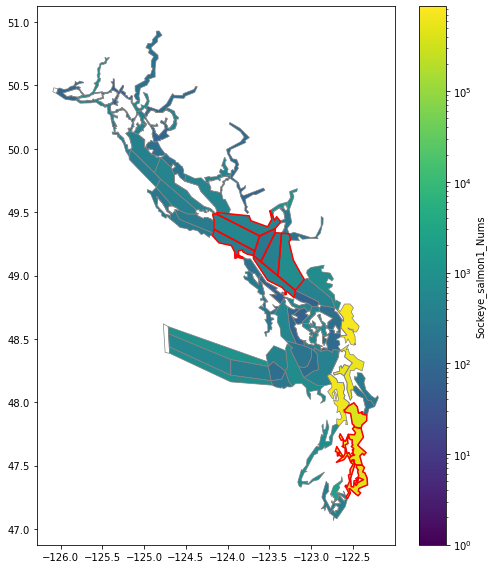

In [33]:
variable_name = 'Sockeye_salmon1_Nums'
plot_data = data.variables[variable_name][0,:]
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
strait_df = data_df.loc[sog_center]
ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()),#vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': variable_name
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
strait_df.boundary.plot(ax=ax, color='red');
ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

## Wild + hatchery salmon

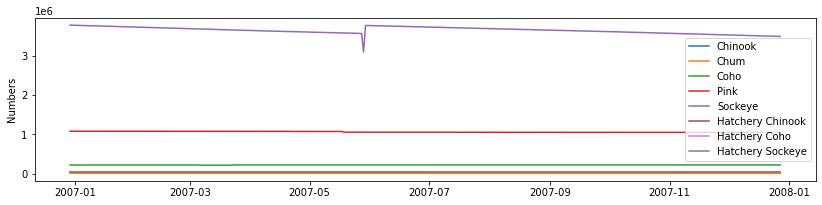

In [7]:
bio_group = groups.salmon
location = groups.salish_sea
fig, ax = plt.subplots(figsize = (14,3))
for species in bio_group:
    time = data.variables['t']
    nums_tbl = data.variables[bio_group[species]+'3_Nums'][:,location,:]
    nums_tb = nums_tbl.sum(axis=2)
    nums_t = nums_tb.sum(axis=1)
    start =  2
    end = time.size

    ax.plot(time[start:end],nums_t[start:end])
ax.legend(bio_group)
#ax.set_title('strait_of_georgia', fontsize = 12)
ax.set_ylabel('Numbers');

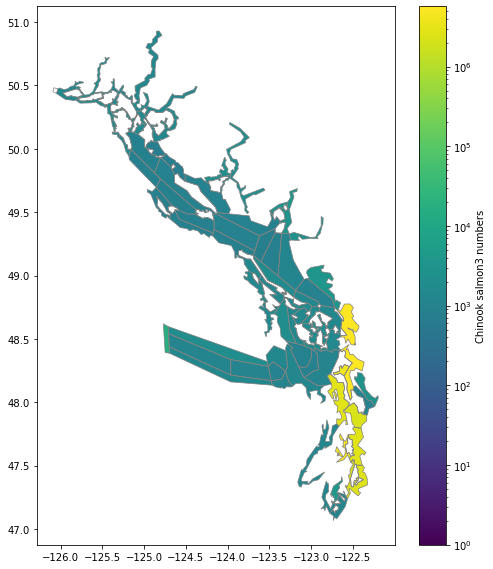

In [10]:
# Wild salmon
plot_data = data.variables['Chinook_salmon3_Nums'] + data.variables[variable2]
plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
#strait_df = data_df.loc[strait_of_georgia]
#ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': 'Chinook salmon3 numbers'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
#strait_df.boundary.plot(ax=ax, color='red');
#ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

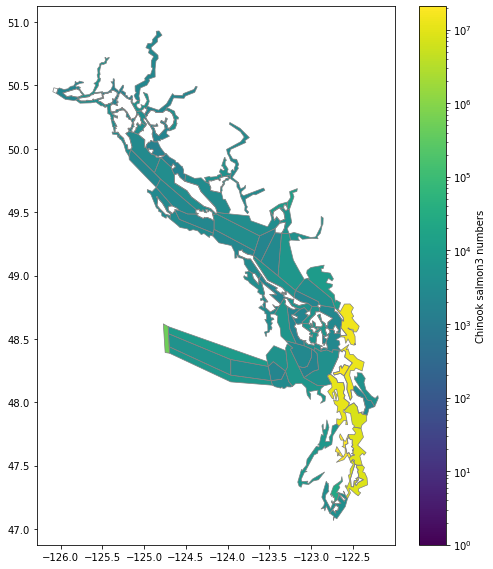

In [11]:
variable1 = 'Coho_salmon3_Nums'
variable2 = 'Hatchery_Coho_salmon3_Nums'
plot_data = data.variables[variable1] + data.variables[variable2]
plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
#strait_df = data_df.loc[strait_of_georgia]
#ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': 'Chinook salmon3 numbers'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
#strait_df.boundary.plot(ax=ax, color='red');
#ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

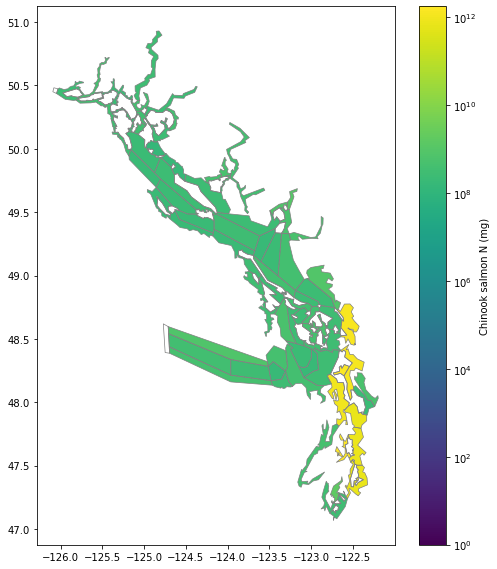

In [14]:
variable1 = 'Chinook_salmon_N'
variable2 = 'Hatchery_Chinook_salmon_N'
plot_data = (data.variables[variable1] + data.variables[variable2]) * data.volume
plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
#strait_df = data_df.loc[strait_of_georgia]
#ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': 'Chinook salmon N (mg)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
#strait_df.boundary.plot(ax=ax, color='red');
#ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

Calculate weight at age in wet weight (tons) to compare with Puget Sound data and with other data on these species in the literature. PSA team uses the following conversations 20  5.7 (redfield ratio) (3.65/2.65)/1000000

In [ ]:
#Hatchery Salmon 
# *20*5.7*(3.65/2.65)/1000000

variable1 = 'Chinook_salmon_N'
variable2 = 'Hatchery_Chinook_salmon_N'
plot_data = (data.variables[variable1] + data.variables[variable2]) * data.volume
plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
#strait_df = data_df.loc[strait_of_georgia]
#ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': 'Chinook salmon N (mg)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
#strait_df.boundary.plot(ax=ax, color='red');
#ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

In [20]:
def compare_cohorts(bio_group, boxes):

    for species in bio_group:

        fig, ax = plt.subplots(figsize = (14,4), sharex='all')

        numCohorts = groups.cohorts[bio_group[species]]

        for cohort in range (1, numCohorts+1):

            new_species = bio_group[species] + str(cohort)
        
            o_numbers_tbl = data.variables[new_species + '_Nums'][:,boxes,:]
            o_structuralN_tbl = data.variables[new_species +'_StructN'][:,boxes,:]
            o_reservedN_tbl = data.variables[new_species +'_ResN'][:,boxes,:]

            o_weightatage_tbl = (o_structuralN_tbl + o_reservedN_tbl * o_numbers_tbl) *20*5.7*(3.65/2.65)/1000000
            o_weightatage_tb = o_weightatage_tbl.sum(axis=2)
            o_weightatage_t = o_weightatage_tb.sum(axis=1)

            ax.plot(time, o_weightatage_t, linewidth = 2)
    
        ax.set_title('Biomass of ' + str(bio_group[species]), fontsize = 12)
        ax.set_ylabel('Wet weight (tonnes)', fontsize = 12)
        ax.tick_params(labelsize=11)
        ax.legend(['cohort 1','cohort 2','cohort 3','cohort 4','cohort 5','cohort 6','cohort 7','cohort 8','cohort 9','cohort 10',]) #loc='center left'

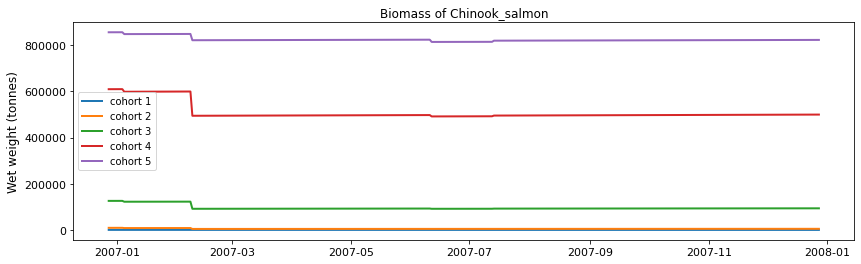

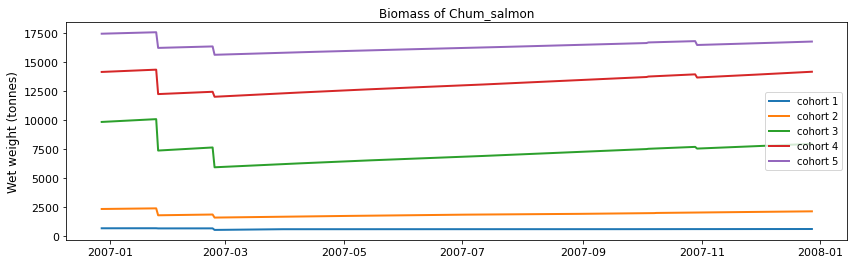

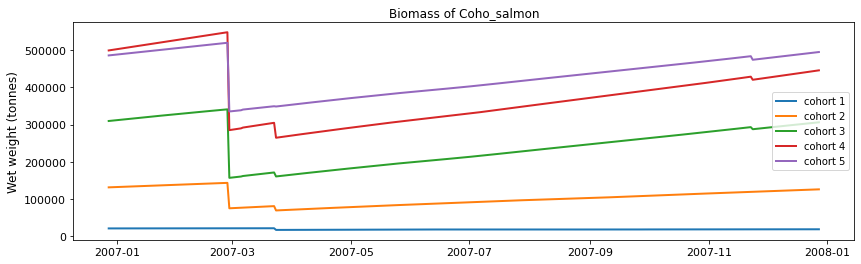

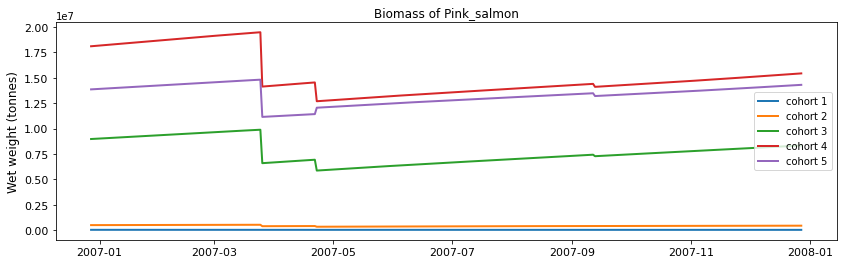

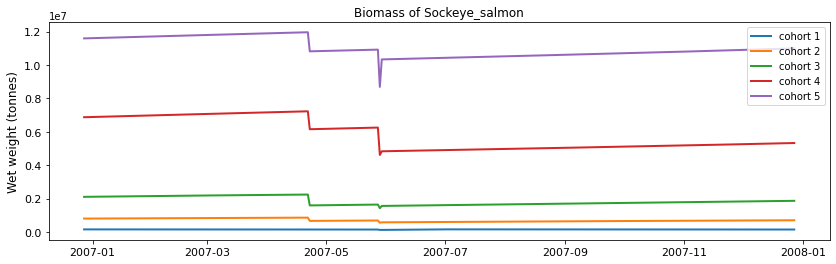

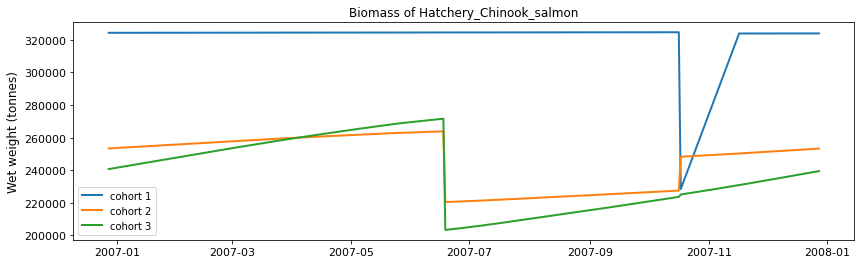

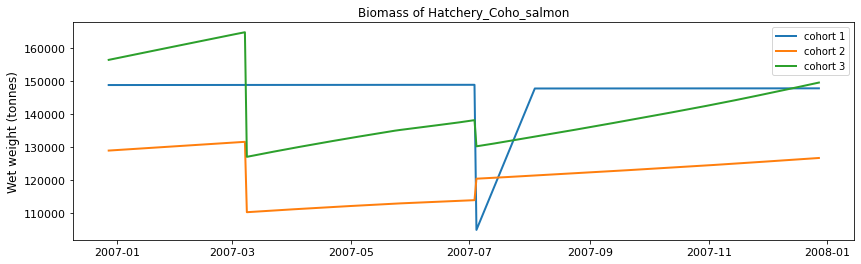

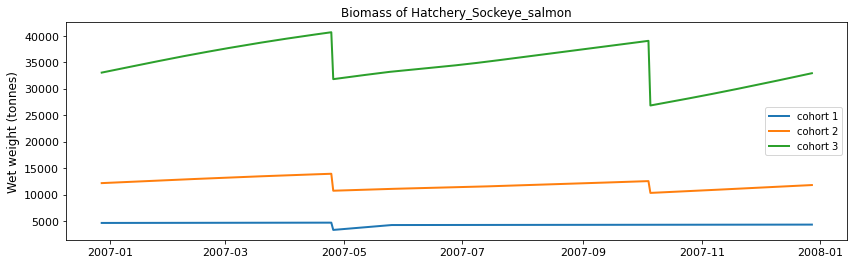

In [19]:
compare_cohorts(groups.salmon, groups.salish_sea)

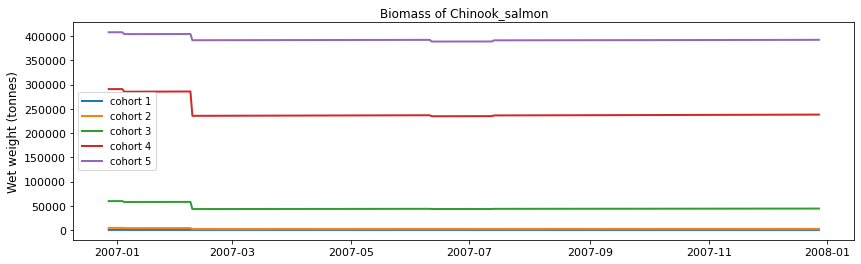

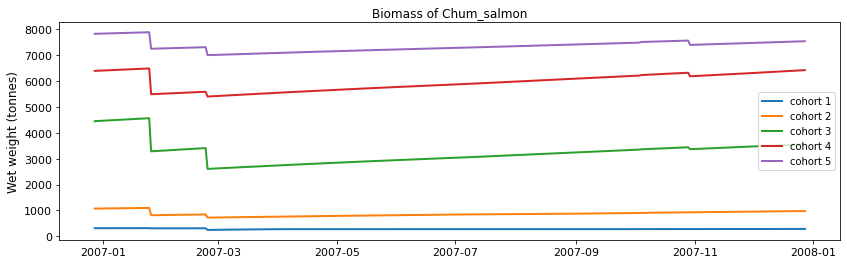

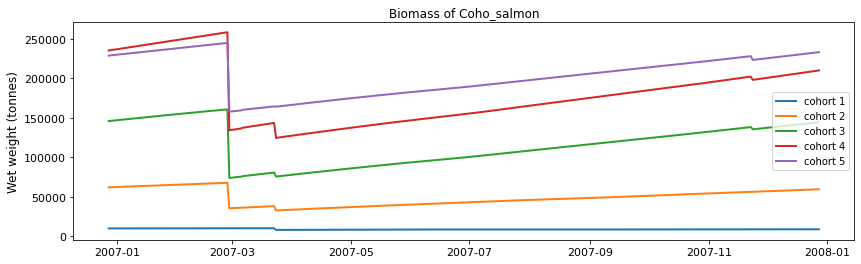

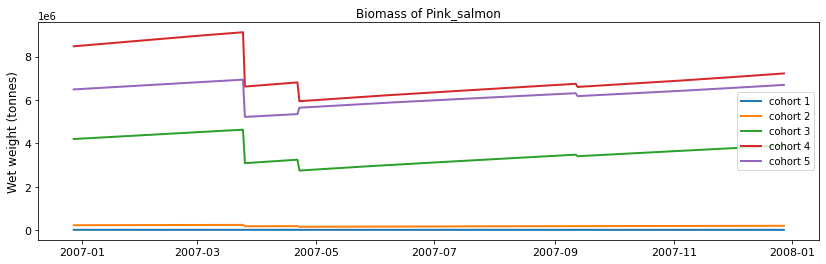

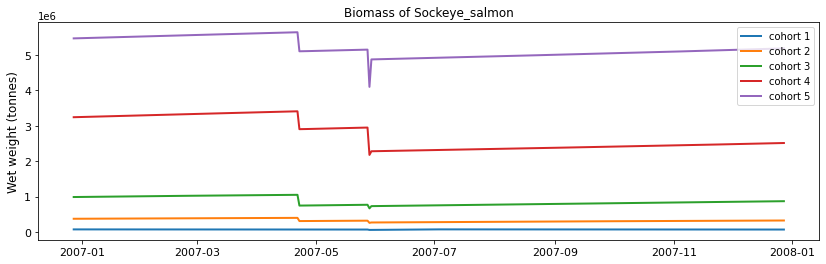

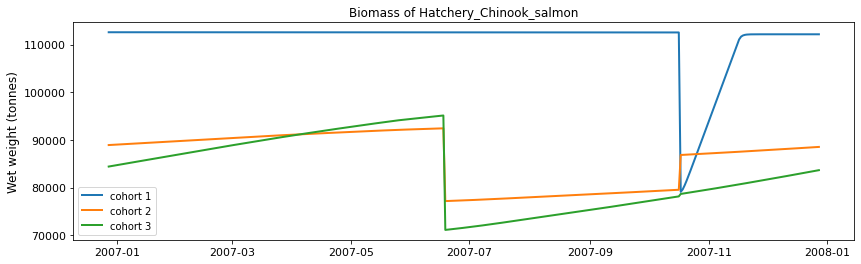

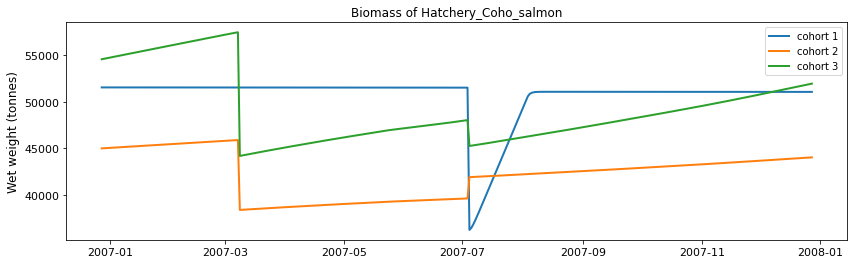

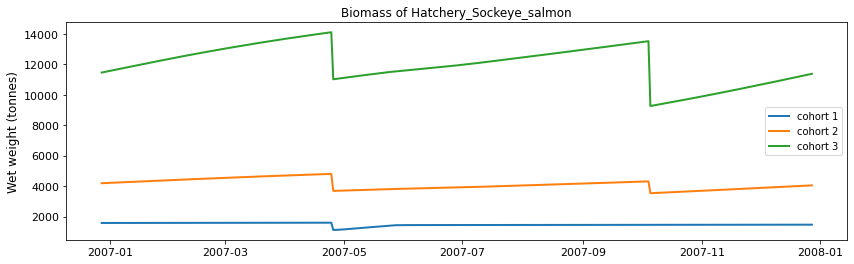

In [22]:
compare_cohorts(groups.salmon, groups.puget_sound_main)

In [ ]:
#Hatchery Salmon 
# *20*5.7*(3.65/2.65)/1000000

variable1 = 'Chinook_salmon_N
plot_data = (data.variables[variable1] + data.variables[variable2]) * data.volume
plot_data = plot_data.sum(axis=0)
data_df['plot_data'] = plot_data.sum(axis=1)
land_df = data_df.loc[land_boxes]
#strait_df = data_df.loc[strait_of_georgia]
#ps_df = data_df.loc[puget_sound_main]

fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'plot_data', ax=ax, cax=cax,norm=colors.LogNorm(vmin=1, vmax=data_df.plot_data.max()), #vmin=0, vmax=20, cmap=cm.Greens,
    legend=True, legend_kwds={'label': 'Chinook salmon N (mg)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
#strait_df.boundary.plot(ax=ax, color='red');
#ps_df.boundary.plot(ax=ax, color='red');
land_df.plot(ax=ax, color='white');

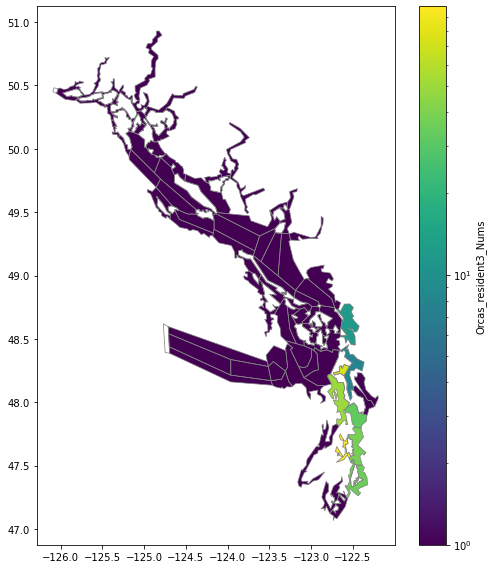

In [63]:
map_numbers('Orcas_resident3',10)